In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages

In [9]:
# Parameters
#learning_rate = 0.01
learning_rate = 0.1
training_epochs = 1000
display_step = 50

In [10]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.129348814 W= 0.3470161 b= -0.029783502
Epoch: 0100 cost= 0.095144272 W= 0.29370946 b= 0.373236
Epoch: 0150 cost= 0.085454196 W= 0.26578575 b= 0.5843505
Epoch: 0200 cost= 0.082635857 W= 0.25115854 b= 0.6949382
Epoch: 0250 cost= 0.081778981 W= 0.24349625 b= 0.752868
Epoch: 0300 cost= 0.081500113 W= 0.23948257 b= 0.7832132
Epoch: 0350 cost= 0.081400670 W= 0.23738001 b= 0.7991092
Epoch: 0400 cost= 0.081361391 W= 0.2362787 b= 0.8074356
Epoch: 0450 cost= 0.081344292 W= 0.23570177 b= 0.8117977
Epoch: 0500 cost= 0.081336334 W= 0.23539944 b= 0.81408316
Epoch: 0550 cost= 0.081332430 W= 0.23524114 b= 0.81527984
Epoch: 0600 cost= 0.081330448 W= 0.23515823 b= 0.81590676
Epoch: 0650 cost= 0.081329428 W= 0.23511489 b= 0.8162345
Epoch: 0700 cost= 0.081328884 W= 0.23509203 b= 0.8164074
Epoch: 0750 cost= 0.081328616 W= 0.23507988 b= 0.816499
Epoch: 0800 cost= 0.081328474 W= 0.23507404 b= 0.81654334
Epoch: 0850 cost= 0.081328407 W= 0.23507077 b= 0.81656814
Epoch: 0900 cost= 0.08132836

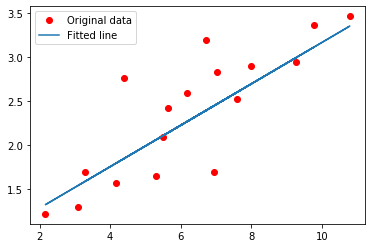

In [15]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            #print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            #    "W=", sess.run(W), "b=", sess.run(b)
            
            #WORKY        
            #print ("Epoch:", (epoch+1), "cost=", format(c), "W=", sess.run(W), "b=", sess.run(b))
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    #print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    #print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()